In [1]:
import numpy as np
import pandas as pd

In [2]:
match = pd.read_csv("matches.csv")
delivery = pd.read_csv("deliveries.csv")

In [3]:
match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [4]:
match.shape


(950, 20)

In [5]:
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
total_score_df = delivery.groupby(['ID','innings']).sum()['total_run'].reset_index()

<ipython-input-6-95a749d13487>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['ID','innings']).sum()['total_run'].reset_index()


In [7]:
total_score_df = total_score_df[total_score_df['innings'] == 1]

In [8]:
total_score_df

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1918,1304116,1,157
1920,1312197,1,188
1922,1312198,1,207
1924,1312199,1,157


In [9]:
match_df = match.merge(total_score_df[['ID','total_run']],left_on = 'ID',right_on = 'ID')

In [10]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,110
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,165
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,129
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,240


In [11]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [12]:
teams = ['Chennai Super Kings',
         'Delhi Capitals',
         'Gujarat Titans',
         'Kolkata Knight Riders',
         'Lucknow Super Giants',
         'Mumbai Indians',
         'Punjab Kings',
         'Rajasthan Royals', 
         'Royal Challengers Bangalore',
         'Sunrisers Hyderabad',
        ]

In [13]:
match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [14]:
match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]

In [15]:
match_df.shape

(660, 21)

In [16]:
match_df = match_df[['ID','City','WinningTeam','total_run']]

In [17]:
match_df

,ID,City,WinningTeam,total_run
0,1312200,Ahmedabad,Gujarat Titans,130
1,1312199,Ahmedabad,Rajasthan Royals,157
2,1312198,Kolkata,Royal Challengers Bangalore,207
3,1312197,Kolkata,Gujarat Titans,188
4,1304116,Mumbai,Punjab Kings,157
...,...,...,...,...
943,335988,Hyderabad,Delhi Daredevils,142
945,335986,Kolkata,Kolkata Knight Riders,110
946,335985,Mumbai,Royal Challengers Bangalore,165
947,335984,Delhi,Delhi Daredevils,129


In [18]:
delivery_df = match_df.merge(delivery,on = 'ID')

In [19]:
delivery_df = delivery_df[delivery_df['innings'] == 2]

In [20]:
delivery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157271,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
157272,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
157273,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
157274,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [21]:
delivery_df['current_score'] = delivery_df.groupby('ID').cumsum()['total_run_y']

<ipython-input-21-fc9dd4da160e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('ID').cumsum()['total_run_y']


In [22]:
delivery_df['runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score']

In [23]:
delivery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,129
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157271,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,142
157272,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,141
157273,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,141
157274,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,140


In [24]:
delivery_df['balls_left'] = 126 - (delivery_df['overs']*6 + delivery_df['ballnumber'])

In [25]:
delivery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130,125
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130,124
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,129,123
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129,122
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157271,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,142,37
157272,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,141,36
157273,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,141,35
157274,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,140,35


In [26]:
delivery_df['player_out'] = delivery_df['player_out'].fillna("0")
delivery_df['player_out'] = delivery_df['player_out'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_out'] = delivery_df['player_out'].astype('int')
wickets = delivery_df.groupby('ID').cumsum()['player_out'].values
delivery_df['wickets'] = 10-wickets
delivery_df.tail()

<ipython-input-26-bea3eb19f5d0>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('ID').cumsum()['player_out'].values


,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets
157271,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,0,0,0,NaN,NaN,Royal Challengers Bangalore,80,142,37,1
157272,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,0,0,0,NaN,NaN,Royal Challengers Bangalore,81,141,36,1
157273,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,0,0,NaN,NaN,Royal Challengers Bangalore,81,141,35,1
157274,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,0,0,0,NaN,NaN,Royal Challengers Bangalore,82,140,35,1
157275,335982,Bangalore,Kolkata Knight Riders,222,2,15,2,SB Joshi,LR Shukla,P Kumar,...,0,1,1,caught,BB McCullum,Royal Challengers Bangalore,82,140,34,0


In [27]:
delivery_df.head()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,0,130,125,10
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,0,130,124,10
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,123,10
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,122,10
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,121,10


In [28]:
#crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [29]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/(120-delivery_df['balls_left'])

In [30]:
delivery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,crr,rrr
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,NaN,NaN,Gujarat Titans,0,130,125,10,-0.000000,-156.000000
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,NaN,NaN,Gujarat Titans,0,130,124,10,-0.000000,-195.000000
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,0,NaN,NaN,Gujarat Titans,1,129,123,10,-2.000000,-258.000000
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,NaN,NaN,Gujarat Titans,1,129,122,10,-3.000000,-387.000000
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,NaN,NaN,Gujarat Titans,1,129,121,10,-6.000000,-774.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157271,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,0,NaN,NaN,Royal Challengers Bangalore,80,142,37,1,5.783133,10.265060
157272,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,0,NaN,NaN,Royal Challengers Bangalore,81,141,36,1,5.785714,10.071429
157273,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,NaN,NaN,Royal Challengers Bangalore,81,141,35,1,5.717647,9.952941
157274,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,0,NaN,NaN,Royal Challengers Bangalore,82,140,35,1,5.788235,9.882353


In [31]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [32]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [33]:
delivery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,crr,rrr,result
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,NaN,NaN,Gujarat Titans,0,130,125,10,-0.000000,-156.000000,1
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,NaN,NaN,Gujarat Titans,0,130,124,10,-0.000000,-195.000000,1
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,NaN,NaN,Gujarat Titans,1,129,123,10,-2.000000,-258.000000,1
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,NaN,NaN,Gujarat Titans,1,129,122,10,-3.000000,-387.000000,1
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,NaN,NaN,Gujarat Titans,1,129,121,10,-6.000000,-774.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157271,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,NaN,NaN,Royal Challengers Bangalore,80,142,37,1,5.783133,10.265060,0
157272,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,NaN,NaN,Royal Challengers Bangalore,81,141,36,1,5.785714,10.071429,0
157273,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,NaN,NaN,Royal Challengers Bangalore,81,141,35,1,5.717647,9.952941,0
157274,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,NaN,NaN,Royal Challengers Bangalore,82,140,35,1,5.788235,9.882353,0


In [34]:
def get_bowling_team(match_id, batting_team):
    match_row = match[match['ID'] == match_id]
    if batting_team == match_row['Team1'].values[0]:
        return match_row['Team2'].values[0]
    else:
        return match_row['Team1'].values[0]

In [35]:
delivery_df['BowlingTeam'] = delivery_df.apply(lambda row: get_bowling_team(row['ID'], row['BattingTeam']), axis=1)

In [36]:
delivery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,crr,rrr,result,BowlingTeam
120,1312200,Ahmedabad,Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,NaN,Gujarat Titans,0,130,125,10,-0.000000,-156.000000,1,Rajasthan Royals
121,1312200,Ahmedabad,Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,NaN,Gujarat Titans,0,130,124,10,-0.000000,-195.000000,1,Rajasthan Royals
122,1312200,Ahmedabad,Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,NaN,Gujarat Titans,1,129,123,10,-2.000000,-258.000000,1,Rajasthan Royals
123,1312200,Ahmedabad,Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,NaN,Gujarat Titans,1,129,122,10,-3.000000,-387.000000,1,Rajasthan Royals
124,1312200,Ahmedabad,Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,NaN,Gujarat Titans,1,129,121,10,-6.000000,-774.000000,1,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157271,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,NaN,Royal Challengers Bangalore,80,142,37,1,5.783133,10.265060,0,Kolkata Knight Riders
157272,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,NaN,Royal Challengers Bangalore,81,141,36,1,5.785714,10.071429,0,Kolkata Knight Riders
157273,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,NaN,Royal Challengers Bangalore,81,141,35,1,5.717647,9.952941,0,Kolkata Knight Riders
157274,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,NaN,Royal Challengers Bangalore,82,140,35,1,5.788235,9.882353,0,Kolkata Knight Riders


In [37]:
delivery_df = delivery_df[delivery_df['overs']!=0]

In [38]:
delivery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,crr,rrr,result,BowlingTeam
126,1312200,Ahmedabad,Gujarat Titans,130,2,1,1,WP Saha,M Prasidh Krishna,Shubman Gill,...,NaN,Gujarat Titans,5,125,119,10,30.000000,750.000000,1,Rajasthan Royals
127,1312200,Ahmedabad,Gujarat Titans,130,2,1,2,WP Saha,M Prasidh Krishna,Shubman Gill,...,NaN,Gujarat Titans,9,121,118,10,27.000000,363.000000,1,Rajasthan Royals
128,1312200,Ahmedabad,Gujarat Titans,130,2,1,3,WP Saha,M Prasidh Krishna,Shubman Gill,...,NaN,Gujarat Titans,9,121,117,10,18.000000,242.000000,1,Rajasthan Royals
129,1312200,Ahmedabad,Gujarat Titans,130,2,1,4,WP Saha,M Prasidh Krishna,Shubman Gill,...,NaN,Gujarat Titans,9,121,116,9,13.500000,181.500000,1,Rajasthan Royals
130,1312200,Ahmedabad,Gujarat Titans,130,2,1,5,MS Wade,M Prasidh Krishna,Shubman Gill,...,NaN,Gujarat Titans,11,119,115,9,13.200000,142.800000,1,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157271,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,NaN,Royal Challengers Bangalore,80,142,37,1,5.783133,10.265060,0,Kolkata Knight Riders
157272,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,NaN,Royal Challengers Bangalore,81,141,36,1,5.785714,10.071429,0,Kolkata Knight Riders
157273,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,NaN,Royal Challengers Bangalore,81,141,35,1,5.717647,9.952941,0,Kolkata Knight Riders
157274,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,NaN,Royal Challengers Bangalore,82,140,35,1,5.788235,9.882353,0,Kolkata Knight Riders


In [39]:
delivery_df['balls_left'] = 126 - (delivery_df['overs']*6 + delivery_df['ballnumber'])

<ipython-input-39-b357b49f4713>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 126 - (delivery_df['overs']*6 + delivery_df['ballnumber'])


In [40]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

<ipython-input-40-aaa657b59072>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])


In [41]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/(120-delivery_df['balls_left'])

<ipython-input-41-1d05e12357de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left']*6)/(120-delivery_df['balls_left'])


In [42]:
delivery_df

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,crr,rrr,result,BowlingTeam
126,1312200,Ahmedabad,Gujarat Titans,130,2,1,1,WP Saha,M Prasidh Krishna,Shubman Gill,...,NaN,Gujarat Titans,5,125,119,10,30.000000,750.000000,1,Rajasthan Royals
127,1312200,Ahmedabad,Gujarat Titans,130,2,1,2,WP Saha,M Prasidh Krishna,Shubman Gill,...,NaN,Gujarat Titans,9,121,118,10,27.000000,363.000000,1,Rajasthan Royals
128,1312200,Ahmedabad,Gujarat Titans,130,2,1,3,WP Saha,M Prasidh Krishna,Shubman Gill,...,NaN,Gujarat Titans,9,121,117,10,18.000000,242.000000,1,Rajasthan Royals
129,1312200,Ahmedabad,Gujarat Titans,130,2,1,4,WP Saha,M Prasidh Krishna,Shubman Gill,...,NaN,Gujarat Titans,9,121,116,9,13.500000,181.500000,1,Rajasthan Royals
130,1312200,Ahmedabad,Gujarat Titans,130,2,1,5,MS Wade,M Prasidh Krishna,Shubman Gill,...,NaN,Gujarat Titans,11,119,115,9,13.200000,142.800000,1,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157271,335982,Bangalore,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,NaN,Royal Challengers Bangalore,80,142,37,1,5.783133,10.265060,0,Kolkata Knight Riders
157272,335982,Bangalore,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,NaN,Royal Challengers Bangalore,81,141,36,1,5.785714,10.071429,0,Kolkata Knight Riders
157273,335982,Bangalore,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,NaN,Royal Challengers Bangalore,81,141,35,1,5.717647,9.952941,0,Kolkata Knight Riders
157274,335982,Bangalore,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,NaN,Royal Challengers Bangalore,82,140,35,1,5.788235,9.882353,0,Kolkata Knight Riders


In [43]:
final_df = delivery_df[['BattingTeam','BowlingTeam','City','runs_left','balls_left','wickets','total_run_x','crr','rrr','result']]

In [44]:
final_df

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr,result
126,Gujarat Titans,Rajasthan Royals,Ahmedabad,125,119,10,130,30.000000,750.000000,1
127,Gujarat Titans,Rajasthan Royals,Ahmedabad,121,118,10,130,27.000000,363.000000,1
128,Gujarat Titans,Rajasthan Royals,Ahmedabad,121,117,10,130,18.000000,242.000000,1
129,Gujarat Titans,Rajasthan Royals,Ahmedabad,121,116,9,130,13.500000,181.500000,1
130,Gujarat Titans,Rajasthan Royals,Ahmedabad,119,115,9,130,13.200000,142.800000,1
...,...,...,...,...,...,...,...,...,...,...
157271,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,37,1,222,5.783133,10.265060,0
157272,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,36,1,222,5.785714,10.071429,0
157273,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,35,1,222,5.717647,9.952941,0
157274,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,140,35,1,222,5.788235,9.882353,0


In [45]:
final_df = final_df.sample(final_df.shape[0])

In [46]:
final_df.sample()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr,result
75477,Kolkata Knight Riders,Delhi Daredevils,Kolkata,41,74,10,98,7.434783,5.347826,1


In [48]:
final_df.dropna(inplace=True)

In [49]:
final_df = final_df[final_df['balls_left'] != 0]

In [50]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [51]:
X_train

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr
153949,Delhi Daredevils,Chennai Super Kings,Chennai,50,53,9,169,10.656716,4.477612
82492,Kolkata Knight Riders,Sunrisers Hyderabad,Visakhapatnam,83,60,7,176,9.300000,8.300000
102587,Chennai Super Kings,Rajasthan Royals,Chennai,134,94,9,185,11.769231,30.923077
142227,Mumbai Indians,Deccan Chargers,Centurion,58,52,7,145,7.676471,5.117647
111376,Royal Challengers Bangalore,Deccan Chargers,Bangalore,74,42,7,181,8.230769,5.692308
...,...,...,...,...,...,...,...,...,...
22673,Kolkata Knight Riders,Delhi Capitals,Sharjah,5,24,4,127,7.625000,0.312500
7921,Punjab Kings,Lucknow Super Giants,Pune,73,63,7,153,8.421053,7.684211
104842,Sunrisers Hyderabad,Delhi Daredevils,Delhi,7,17,3,114,6.233010,0.407767
57467,Royal Challengers Bangalore,Delhi Daredevils,Delhi,45,47,8,181,11.178082,3.698630


In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','City'])
]
,remainder='passthrough')

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [95]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [96]:
pipe.fit(X_train,y_train)

/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [97]:
y_pred = pipe.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.829318906099459

In [99]:
pipe.predict_proba(X_test)[10]

array([0.03811986, 0.96188014])

In [100]:
def match_summary(row):
    print("Batting Team-" + row['BattingTeam'] + " | Bowling Team-" + row['BowlingTeam'] + " | Target- " + str(row['total_run_x']))

In [101]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['ID'] == match_id]
    match = match[(match['ballnumber'] == 6)]
    temp_df = match[['BattingTeam','BowlingTeam','City','runs_left','balls_left','wickets','total_run_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_run_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [102]:
temp_df,target = match_progression(delivery_df,335982,pipe)
temp_df

Target- 222


,end_of_over,runs_after_over,wickets_in_over,lose,win
157187,1,9,1,98.8,1.2
157193,2,2,1,99.5,0.5
157200,3,5,0,99.5,0.5
157206,4,8,1,99.7,0.3
157212,5,2,1,99.9,0.1
157218,6,3,0,99.9,0.1
157226,7,9,1,99.9,0.1
157232,8,3,1,100.0,0.0
157240,9,9,1,100.0,0.0
157247,10,6,0,100.0,0.0


Text(0.5, 1.0, 'Target-222')

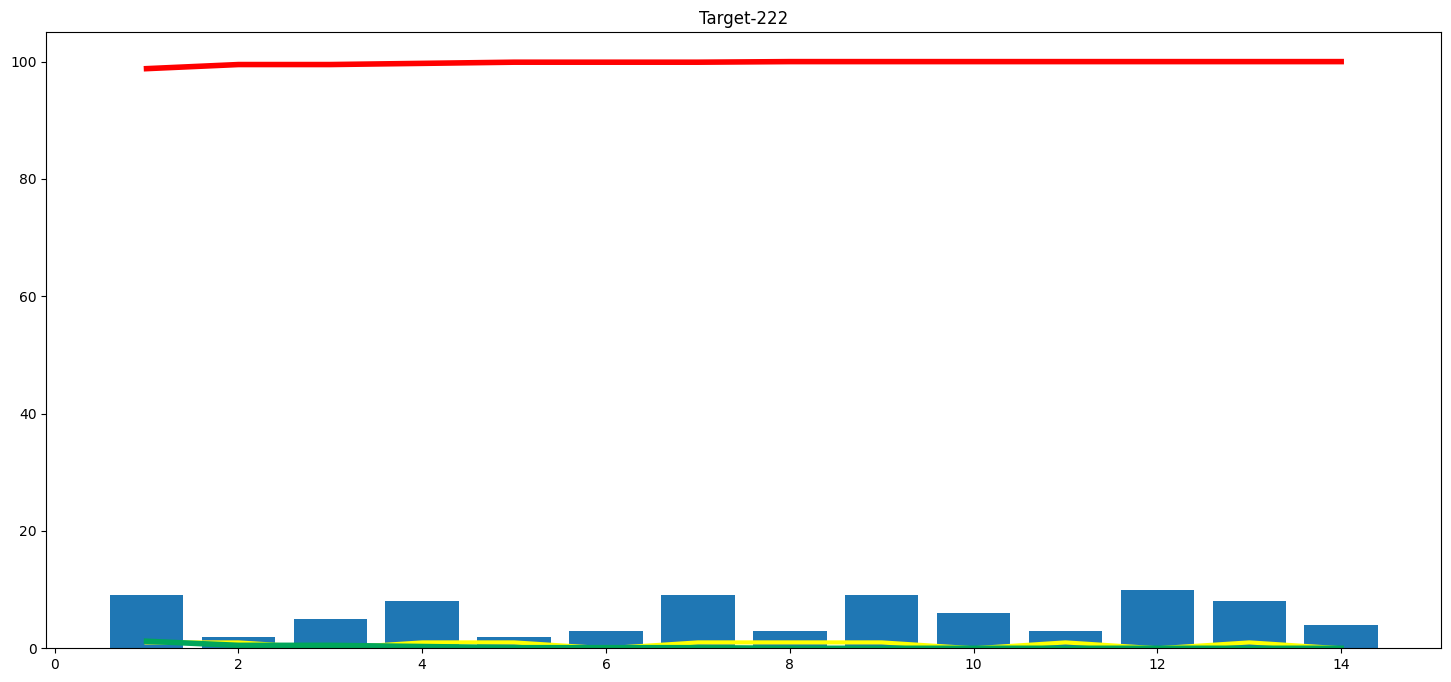

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [87]:
teams

['Chennai Super Kings',
 'Delhi Capitals',
 'Gujarat Titans',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Punjab Kings',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [88]:
delivery_df['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Bengaluru', 'Jaipur', 'Bangalore', 'Raipur',
       'Ranchi', 'Cuttack', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley',
       'East London', 'Cape Town'], dtype=object)

In [89]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))